In [43]:
import pickle
import os
import numpy as np
import shutil
import pandas as pd
import seaborn as sns
from models.gaussian_mixture import remove_outliers, gaussian_mixture
from preprocessing.read_winter import load_winter
from graphs.mixture_fit import combined_fit_mixture
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

# 1. Create combined graphs using exoplanets data

In [2]:
def combined_gaussians(show_graph=False, save_graph=False):
    sigma = 2
    fig_dir=None
    if save_graph:  
        if os.path.isdir(f"figures/combined_gaussians"):
            shutil.rmtree(f"figures/combined_gaussians")
        fig_dir = "figures/combined_gaussians"
    
        os.mkdir(fig_dir)     
    
    labels = pd.read_csv(f"data/crossmatch/dr3/gaiaedr3_star_labels.csv", dtype={"source_id": str, "Host": str}, nrows=1172)
    
    results = []
    n_files = 0
    for file_name in os.listdir("data/densities/dr3"):
        if "_0_200000" in file_name:
            with open(f"data/densities/dr3/{file_name}", "rb") as f:
                densities = pickle.load(f)
        else:
            continue
        
        densities = densities[:1047]

        stars = []
        for i in densities:
            # Compute log10 of the host density and expand dimensions for further use
            target = np.expand_dims(np.log10(i[1]), axis=0).T

            # Remove outliers outside sigma
            data = remove_outliers(i[4], sigma=sigma)

            # Apply gaussian mixture model to the data
            model, scores = gaussian_mixture(data, [target], components=2, scores_only=False)
            
            host_name = labels[labels["source_id"] == i[0]].values[0][1]
            
            # Draw best fit mixture
            if "5d" in file_name:
                host = ["_".join(file_name.rsplit("_", 5)[1:4]) + "_" + host_name, target]
            else:
                host = [file_name.rsplit("_", 4)[2] + "_" + host_name, target]

            stars.append((model, data, host))
        n_files += 1
        results.append(stars)

    for i in range(len(results[0])):
        models = []
        data = []
        hosts = []
        for j in range(n_files):
            models.append(results[j][i][0])
            data.append(results[j][i][1])
            hosts.append(results[j][i][2])
        
        print(hosts)
        combined_fit_mixture(models, data, hosts, n_files, fig_dir=fig_dir, show_graph=show_graph, save_graph=save_graph)

[['5d_drop_rv_11Com', array([-1.05038895])], ['6d_11Com', array([-1.39448674])]]


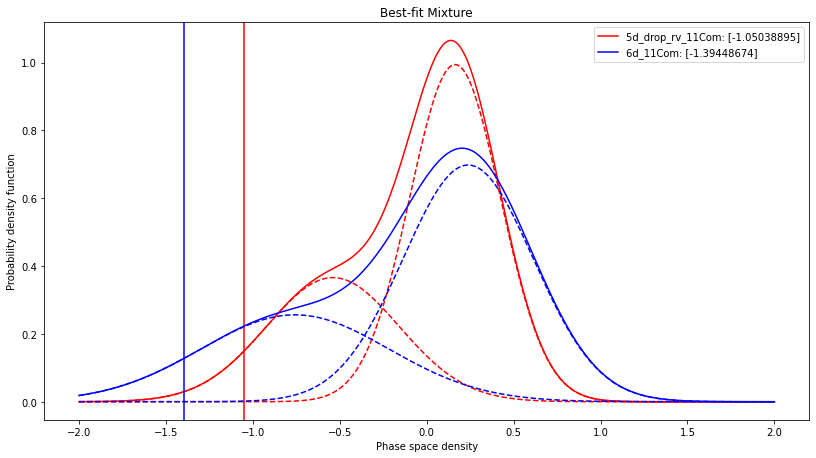

[['5d_drop_rv_11UMi', array([0.15824691])], ['6d_11UMi', array([0.32738119])]]


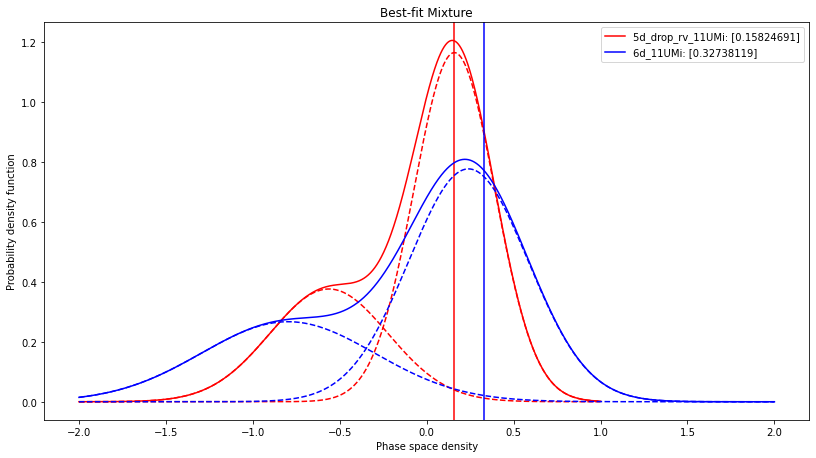

[['5d_drop_rv_14And', array([-1.50811935])], ['6d_14And', array([-2.15262827])]]


[['5d_drop_rv_14Her', array([-0.39667548])], ['6d_14Her', array([0.0185386])]]


[['5d_drop_rv_16CygB', array([-0.10879749])], ['6d_16CygB', array([0.25654132])]]


[['5d_drop_rv_18Del', array([0.03048302])], ['6d_18Del', array([-0.00899378])]]


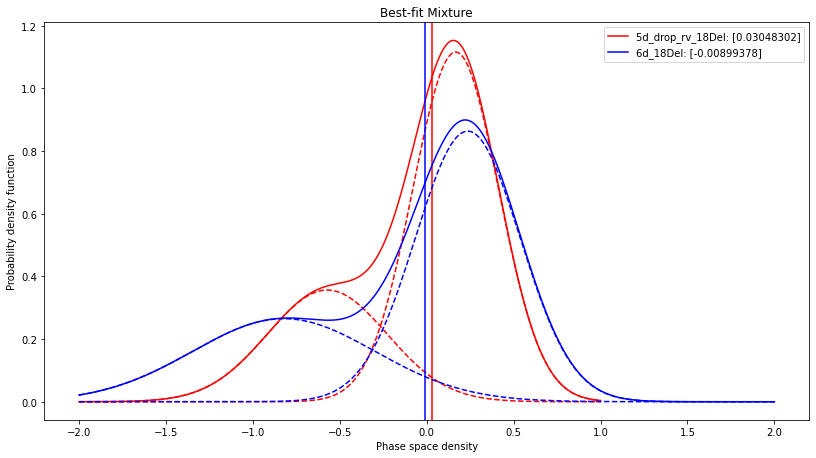

[['5d_drop_rv_24Boo', array([-1.96461003])], ['6d_24Boo', array([-2.55242981])]]


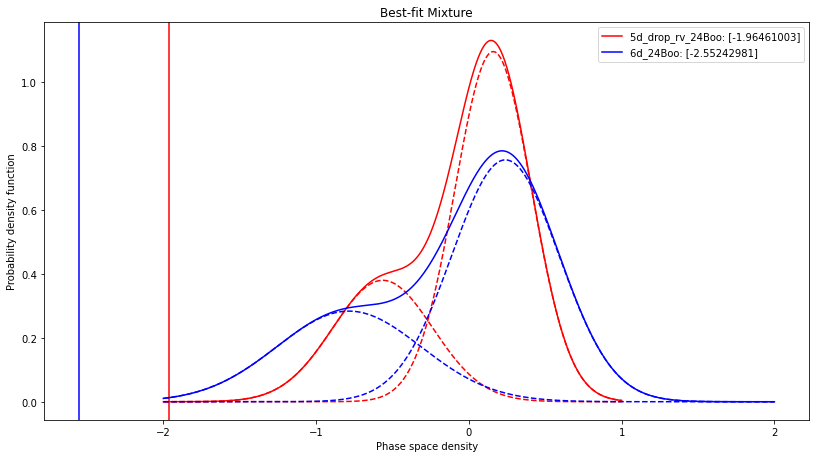

[['5d_drop_rv_24Sex', array([-0.04285287])], ['6d_24Sex', array([-0.10997181])]]


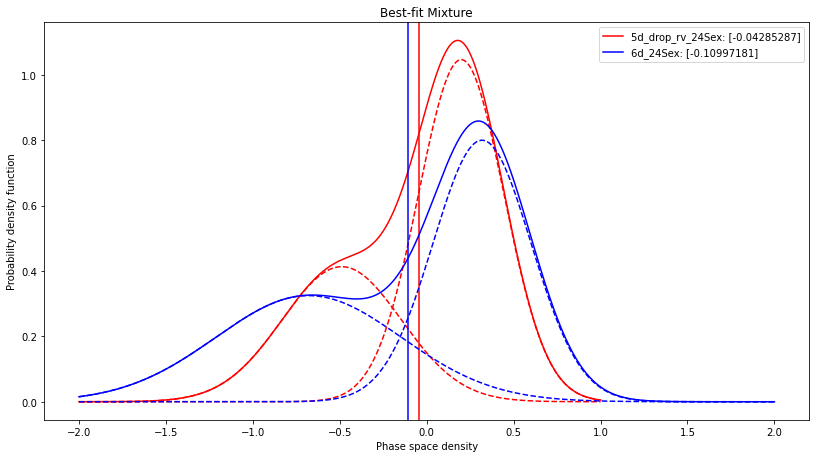

[['5d_drop_rv_2MASSJ22362452+4751425', array([0.0577772])], ['6d_2MASSJ22362452+4751425', array([0.22036007])]]


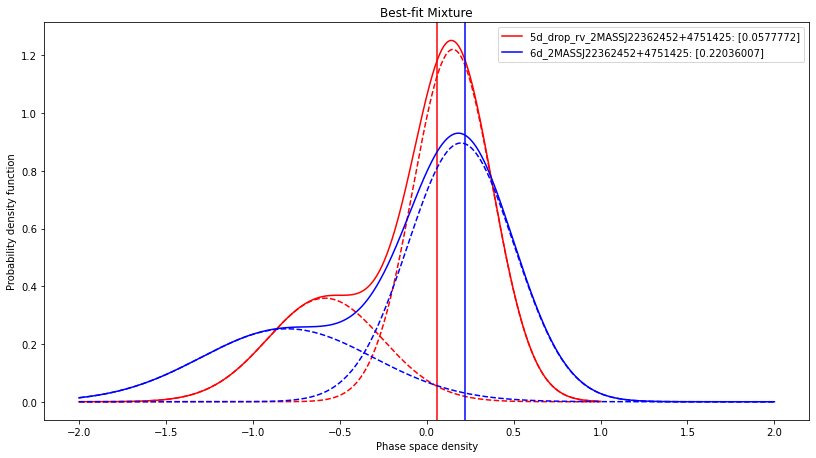

[['5d_drop_rv_30AriB', array([0.39132108])], ['6d_30AriB', array([0.57202547])]]


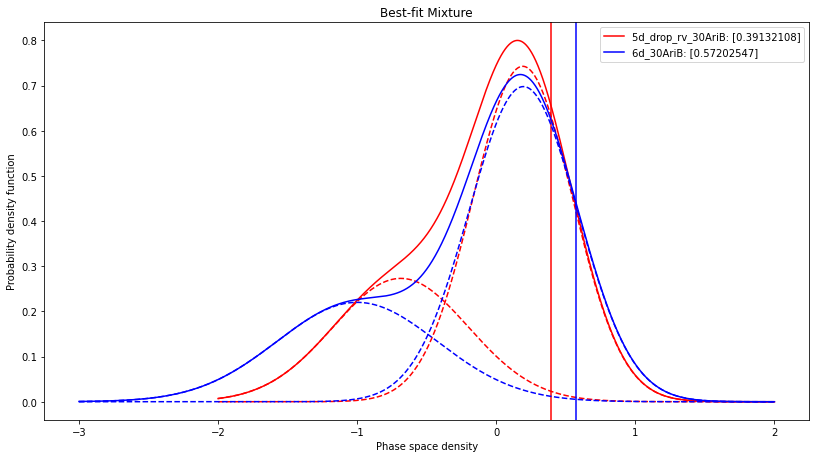

[['5d_drop_rv_47UMa', array([-0.50867788])], ['6d_47UMa', array([0.34351497])]]


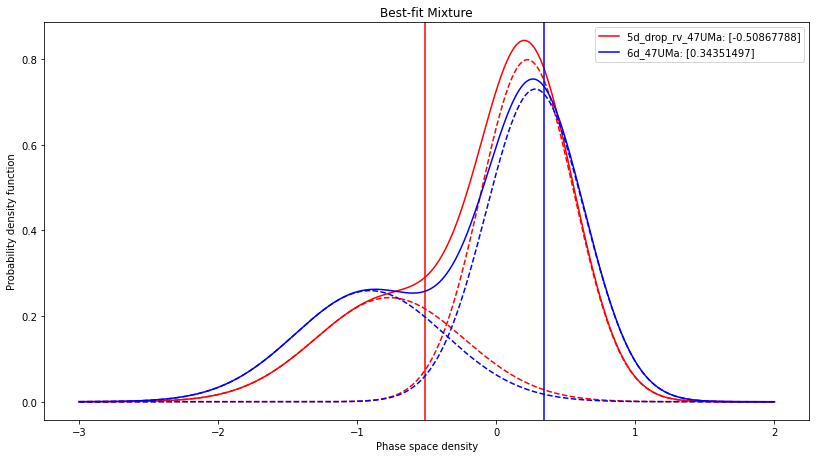

[['5d_drop_rv_51Peg', array([-0.17587268])], ['6d_51Peg', array([0.16167119])]]


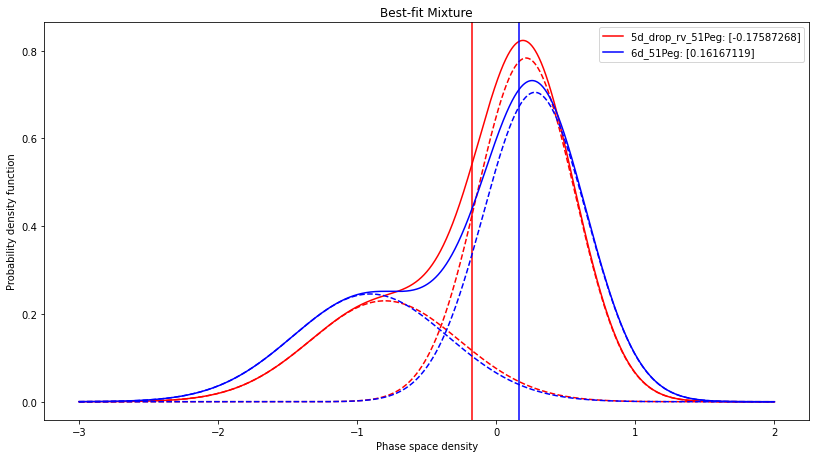

[['5d_drop_rv_55Cnc', array([-1.25391417])], ['6d_55Cnc', array([-0.28810974])]]


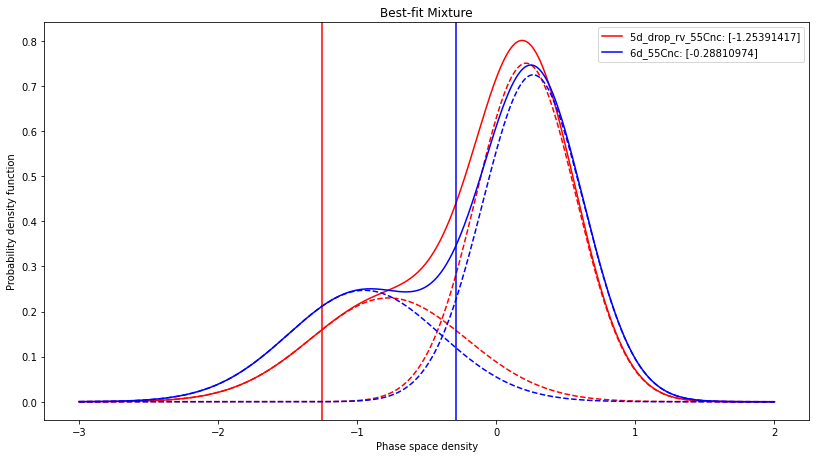

[['5d_drop_rv_6Lyn', array([-0.97225072])], ['6d_6Lyn', array([-1.63223073])]]


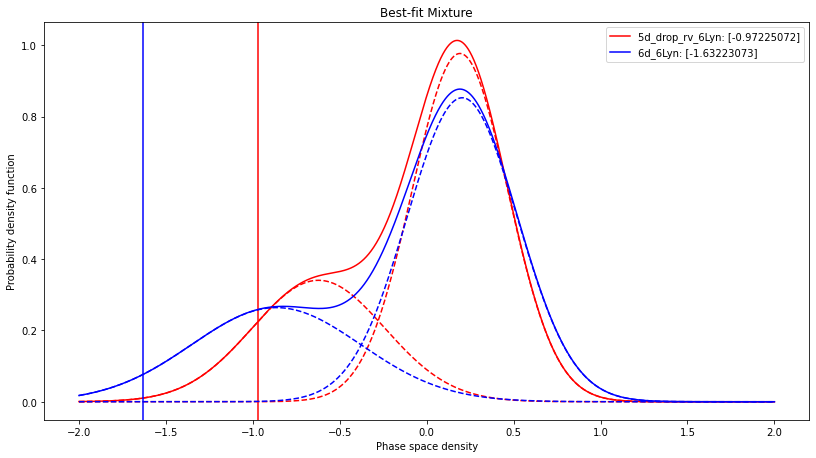

[['5d_drop_rv_61Vir', array([-4.14566729])], ['6d_61Vir', array([-1.26509892])]]


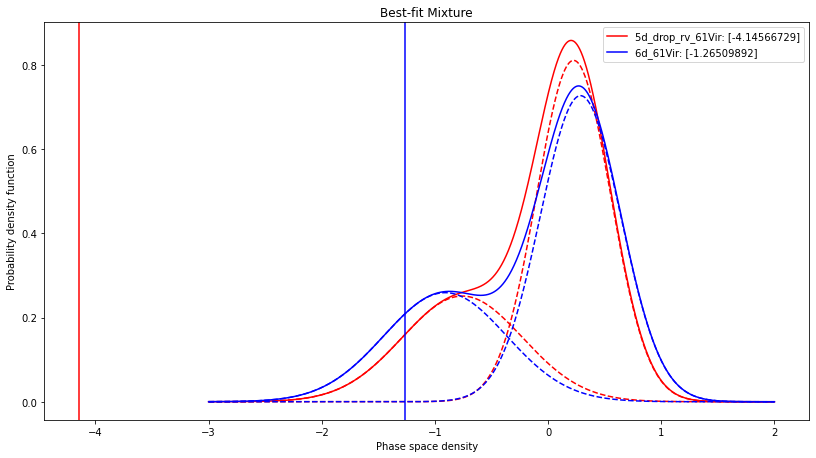

[['5d_drop_rv_75Cet', array([0.2732324])], ['6d_75Cet', array([0.30495569])]]


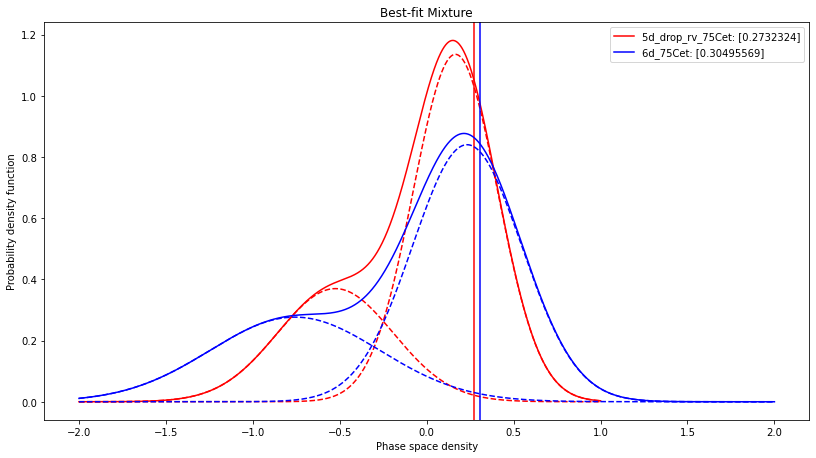

[['5d_drop_rv_8UMi', array([0.41546819])], ['6d_8UMi', array([0.48420502])]]


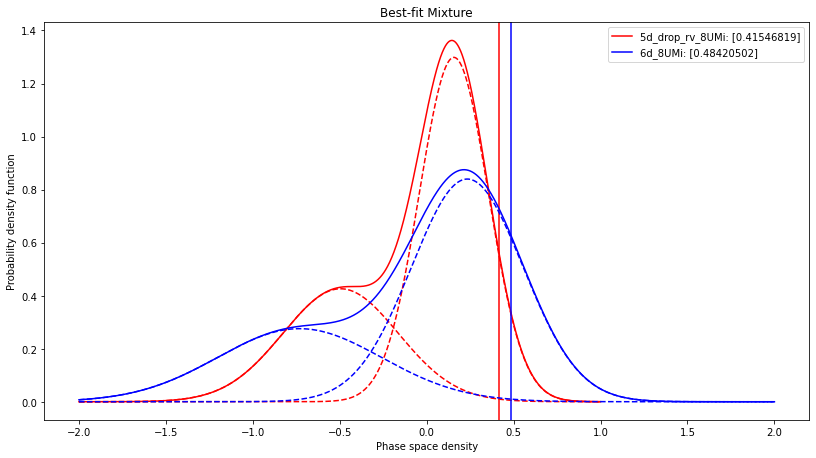

[['5d_drop_rv_81Cet', array([0.03825099])], ['6d_81Cet', array([0.1266649])]]


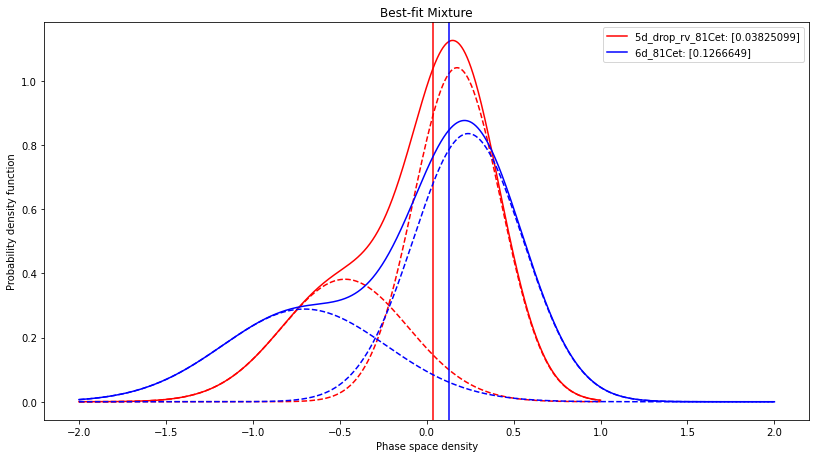

[['5d_drop_rv_91Aqr', array([-0.72987339])], ['6d_91Aqr', array([-1.1873023])]]


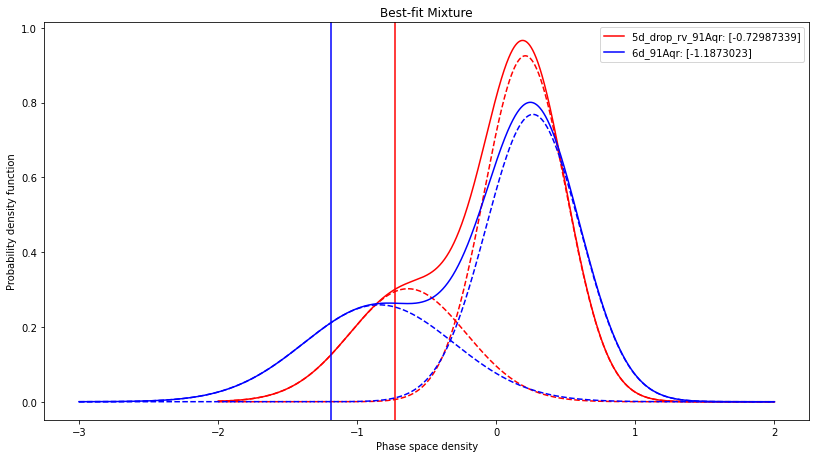

[['5d_drop_rv_ABPic', array([0.44862847])], ['6d_ABPic', array([0.74327041])]]


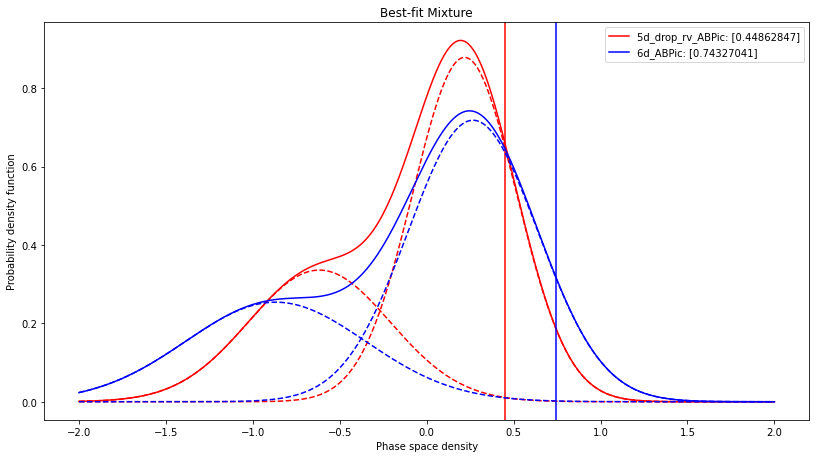

[['5d_drop_rv_AUMic', array([-0.90073838])], ['6d_AUMic', array([0.0926004])]]


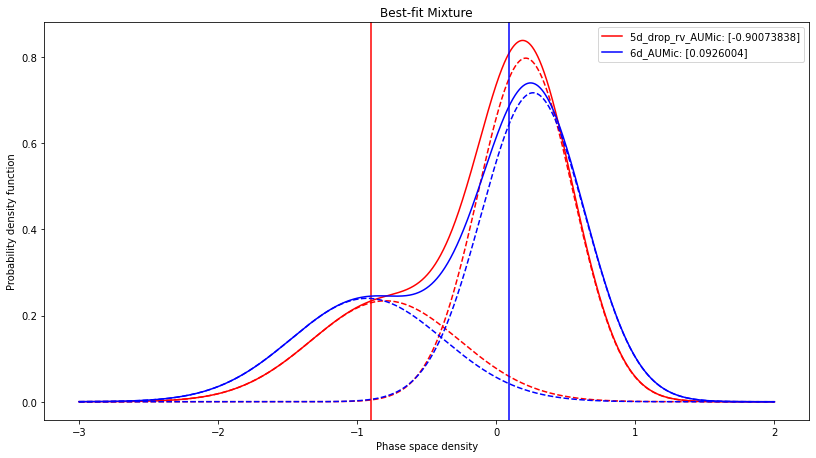

[['5d_drop_rv_BD+144559', array([-0.46459178])], ['6d_BD+144559', array([-0.80187996])]]


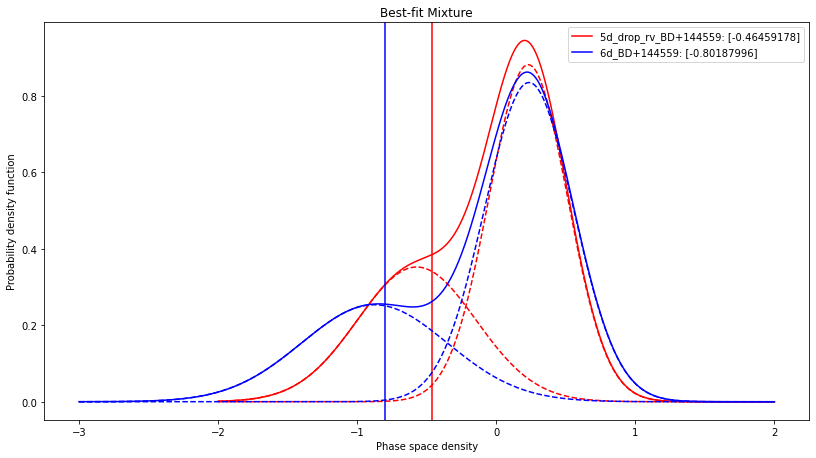

[['5d_drop_rv_BD+152940', array([-0.81212928])], ['6d_BD+152940', array([-1.06404394])]]


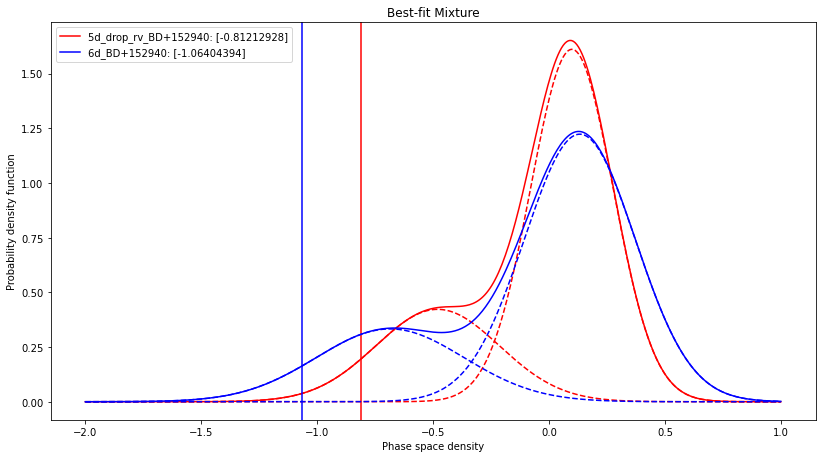

[['5d_drop_rv_BD+20594', array([-0.36225663])], ['6d_BD+20594', array([-0.44456792])]]


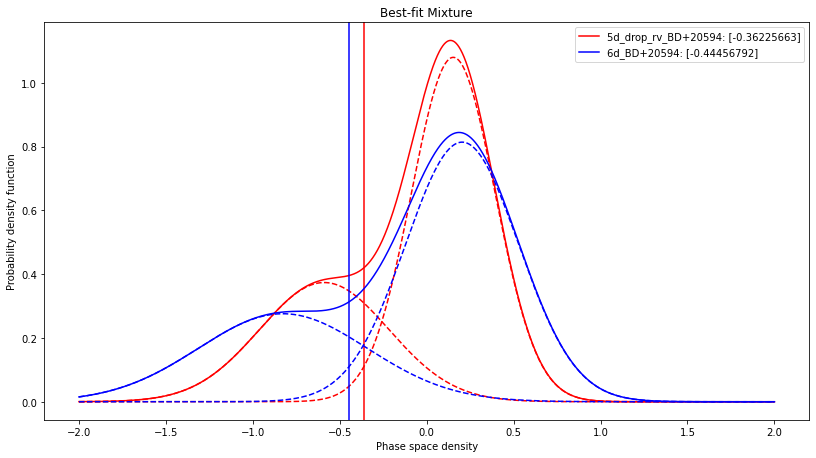

[['5d_drop_rv_BD+49828', array([0.16580412])], ['6d_BD+49828', array([0.32159401])]]


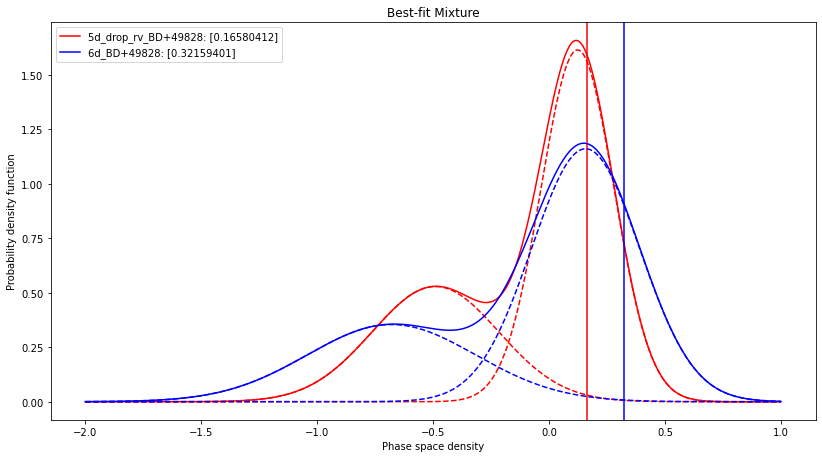

[['5d_drop_rv_BD-061339', array([-0.50091365])], ['6d_BD-061339', array([-0.41676772])]]


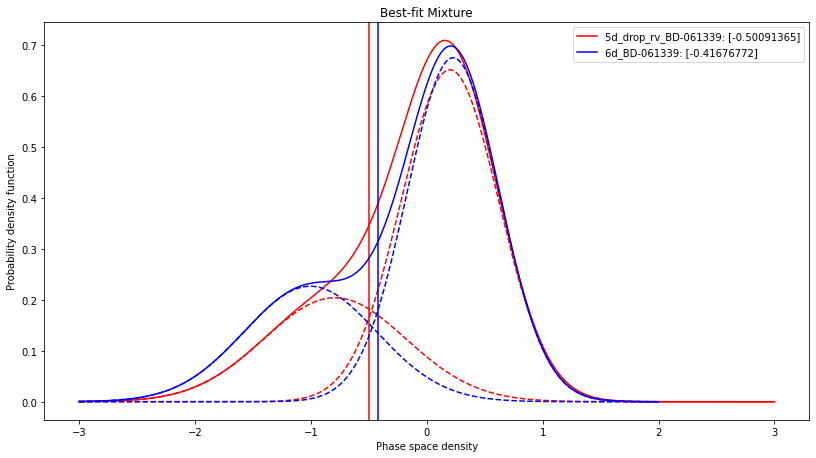

[['5d_drop_rv_BD-082823', array([-0.852307])], ['6d_BD-082823', array([-1.43134329])]]


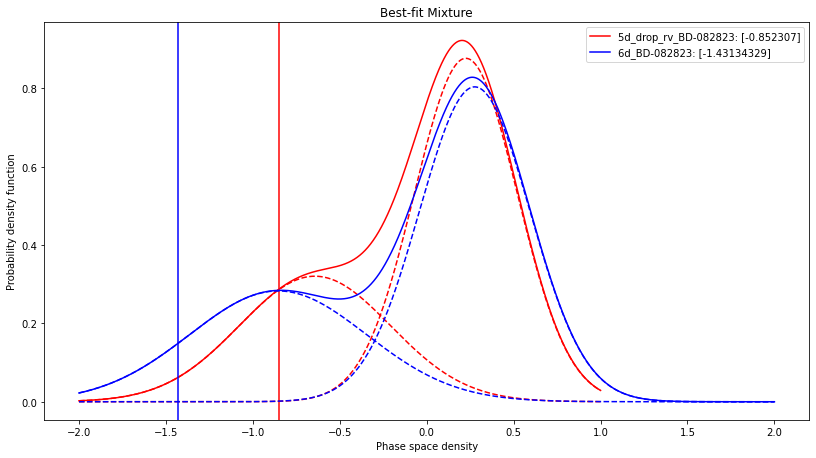

[['5d_drop_rv_BD-103166', array([-0.45175353])], ['6d_BD-103166', array([-0.68861446])]]


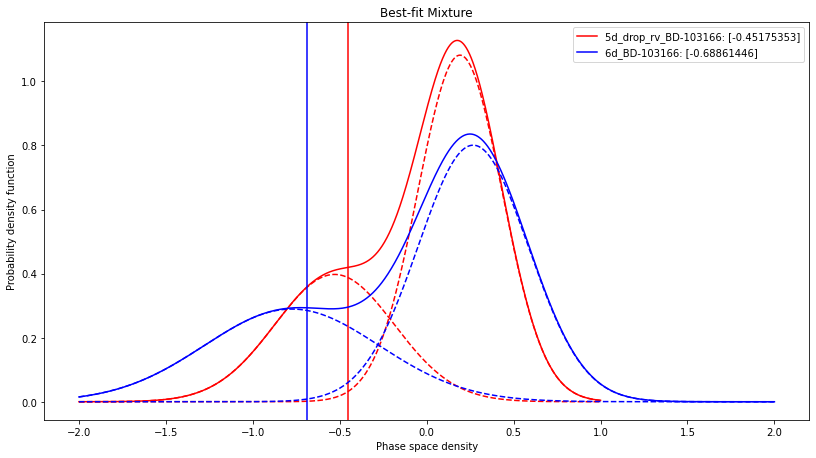

[['5d_drop_rv_BD-1763', array([-1.03989731])], ['6d_BD-1763', array([-1.60889518])]]


[['5d_drop_rv_CoRoT-7', array([0.0190756])], ['6d_CoRoT-7', array([0.01991494])]]


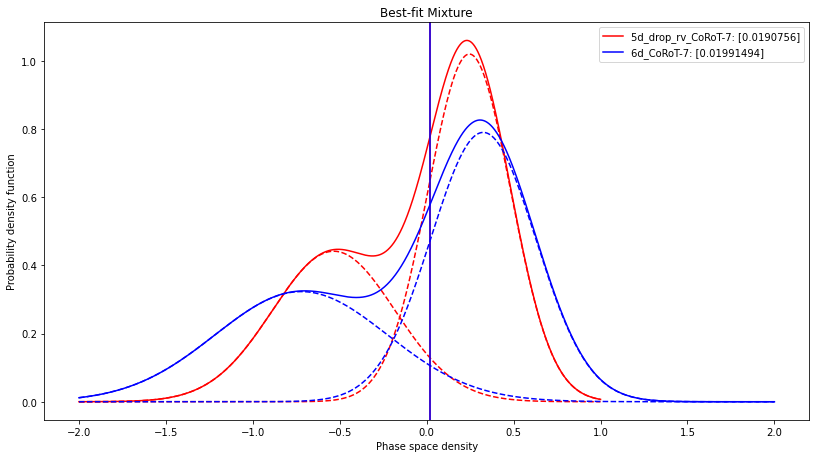

[['5d_drop_rv_DMPP-1', array([0.24187305])], ['6d_DMPP-1', array([0.46785487])]]


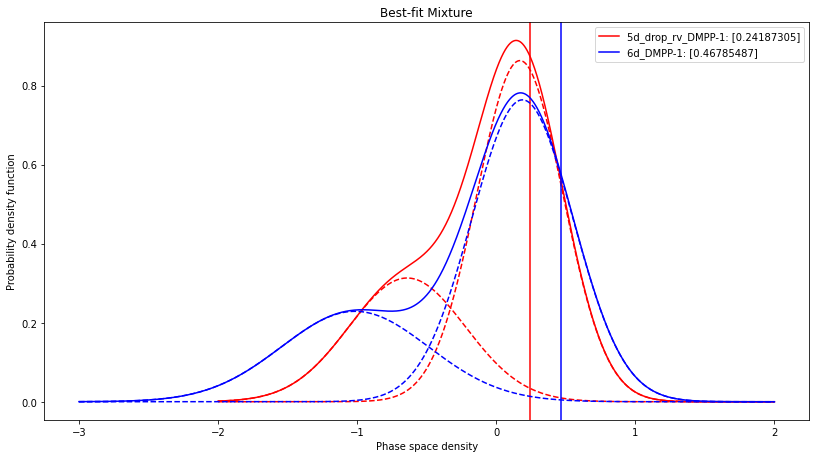

[['5d_drop_rv_DMPP-2', array([-0.05277836])], ['6d_DMPP-2', array([-0.04681582])]]


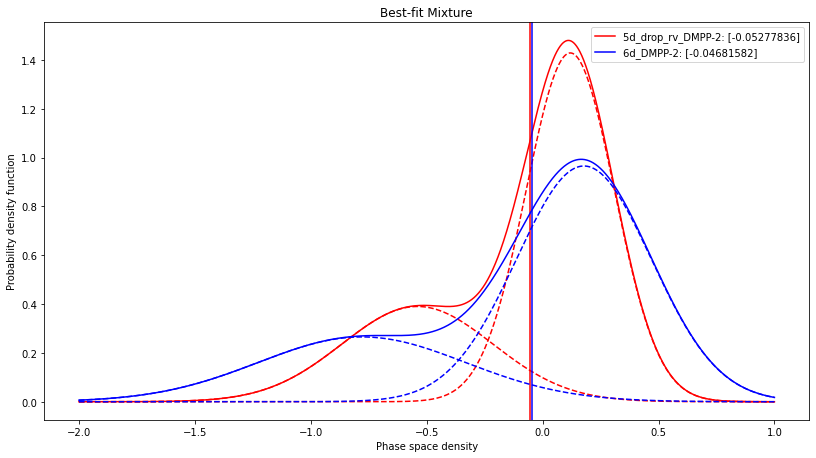

[['5d_drop_rv_DSTucA', array([0.73286501])], ['6d_DSTucA', array([1.07541914])]]


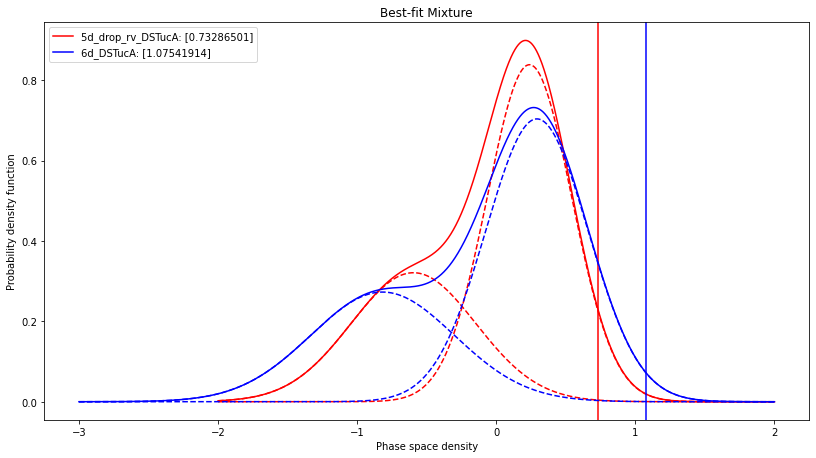

[['5d_drop_rv_K2-168', array([-0.11834969])], ['6d_K2-168', array([-0.04425294])]]


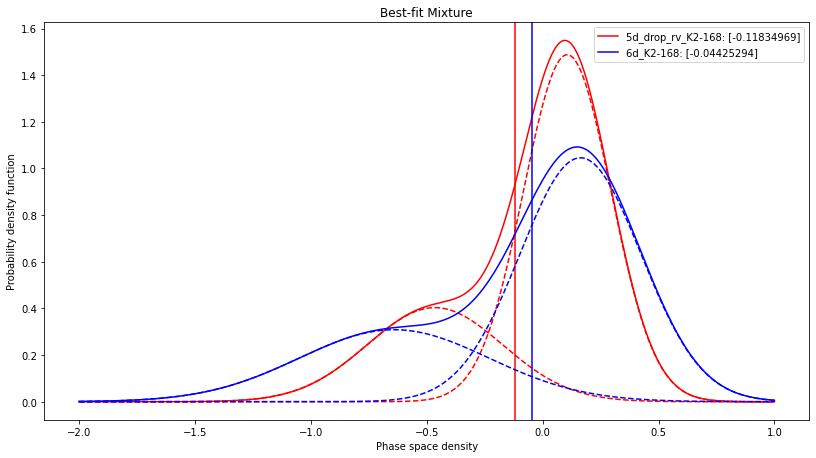

[['5d_drop_rv_EPIC211945201', array([-0.82221201])], ['6d_EPIC211945201', array([-1.09965566])]]


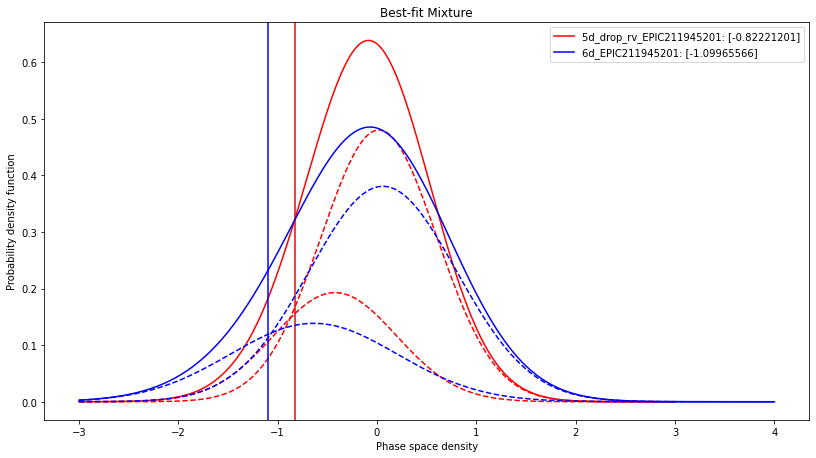

[['5d_drop_rv_EPIC220674823', array([-0.44280926])], ['6d_EPIC220674823', array([-0.57811154])]]


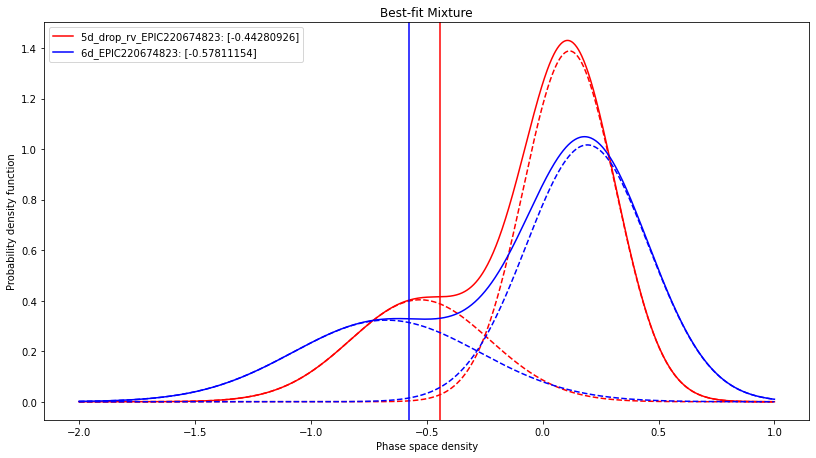

[['5d_drop_rv_EPIC249893012', array([-0.70886177])], ['6d_EPIC249893012', array([-0.87499386])]]


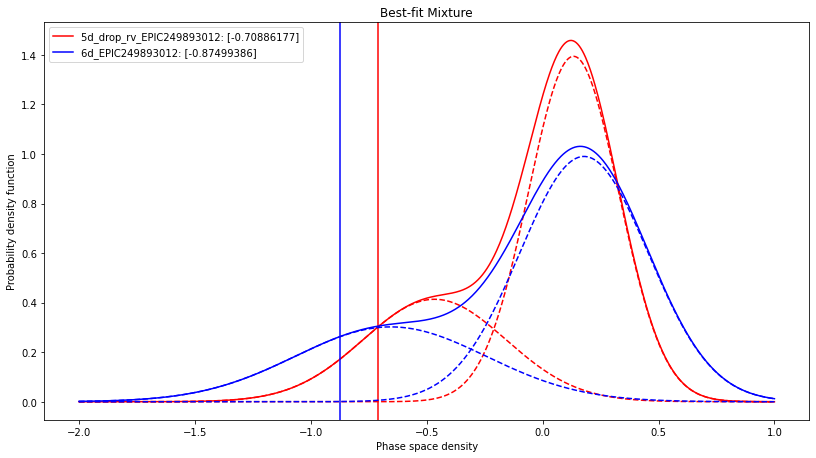

[['5d_drop_rv_GJ1252', array([-3.26359682])], ['6d_GJ1252', array([-2.86447186])]]


[['5d_drop_rv_GJ143', array([-0.76147735])], ['6d_GJ143', array([-0.43871826])]]


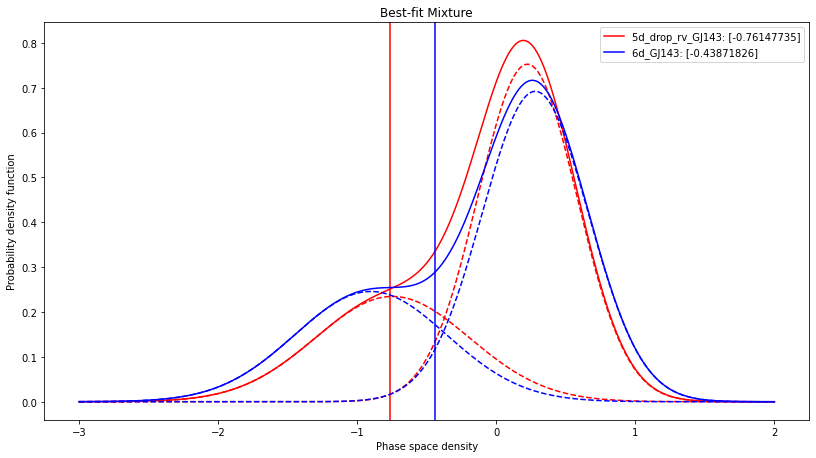

[['5d_drop_rv_GJ15A', array([-6.54276619])], ['6d_GJ15A', array([-0.46619949])]]


[['5d_drop_rv_GJ180', array([-1.66258243])], ['6d_GJ180', array([-1.2116318])]]


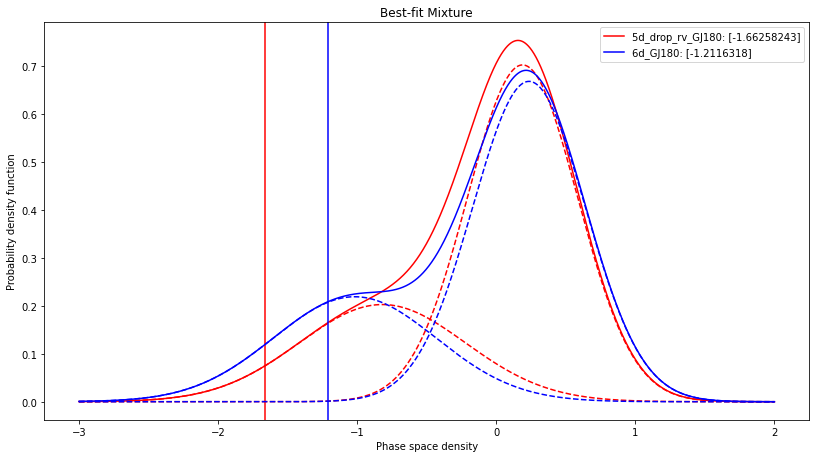

[['5d_drop_rv_GJ2056', array([0.15978298])], ['6d_GJ2056', array([0.61702381])]]


[['5d_drop_rv_GJ229', array([-1.50689408])], ['6d_GJ229', array([-0.14154251])]]


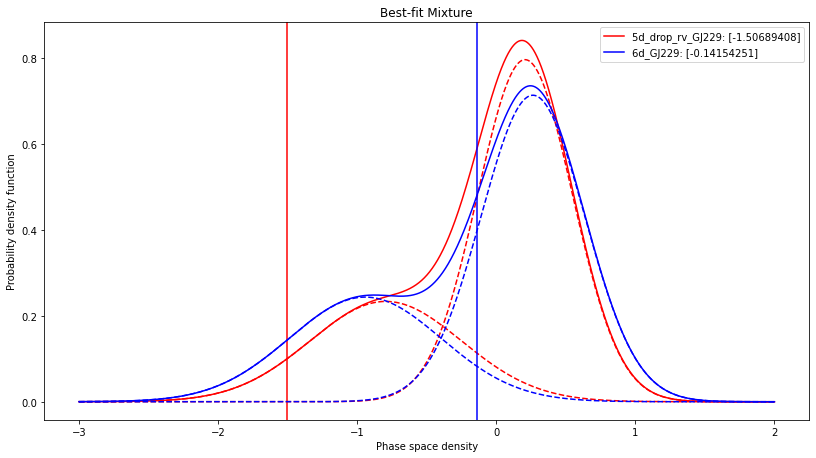

[['5d_drop_rv_GJ3021', array([-0.92766043])], ['6d_GJ3021', array([0.64467109])]]


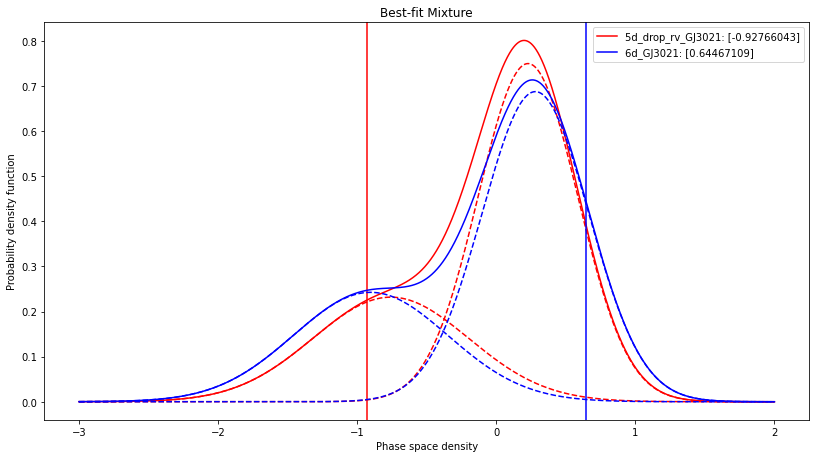

[['5d_drop_rv_GJ3082', array([-0.9073663])], ['6d_GJ3082', array([-0.40784222])]]


[['5d_drop_rv_GJ3138', array([-0.95733458])], ['6d_GJ3138', array([-1.41196111])]]


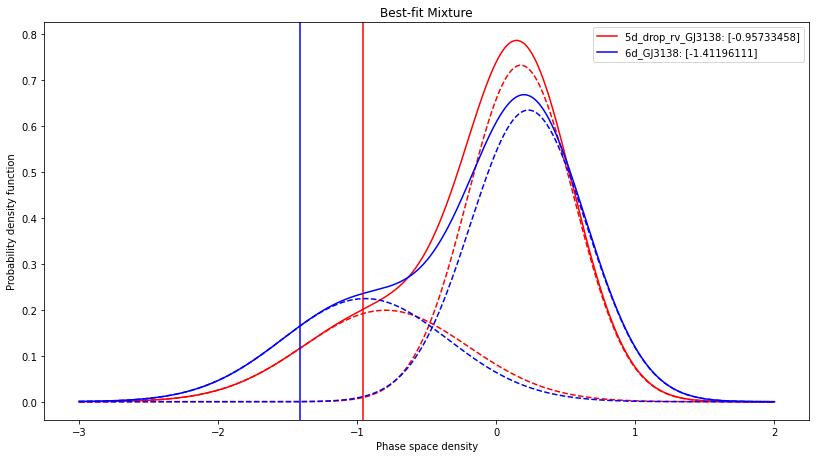

[['5d_drop_rv_GJ3341', array([-1.3367175])], ['6d_GJ3341', array([-1.77519778])]]


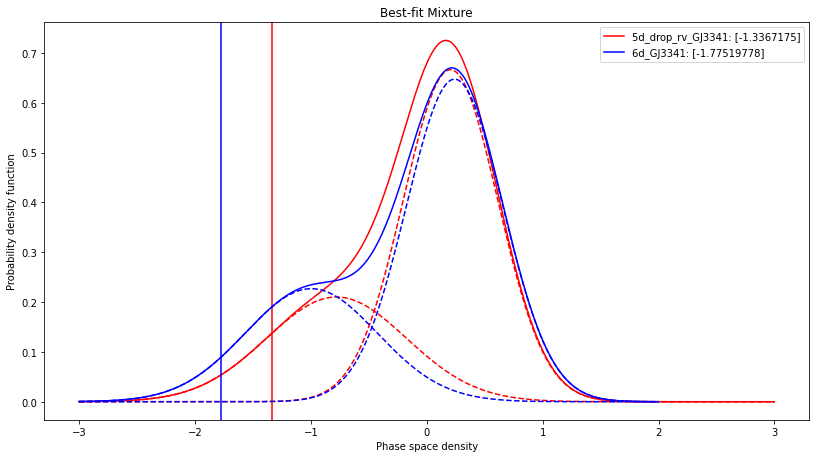

[['5d_drop_rv_GJ338B', array([-4.34510027])], ['6d_GJ338B', array([-0.13854835])]]


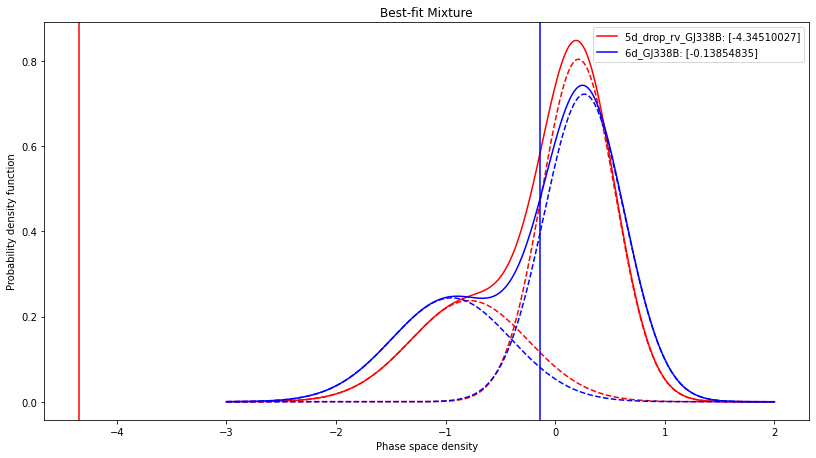

[['5d_drop_rv_GJ3470', array([-0.13697964])], ['6d_GJ3470', array([-0.08708672])]]


[['5d_drop_rv_GJ3942', array([-0.39948488])], ['6d_GJ3942', array([0.25148152])]]


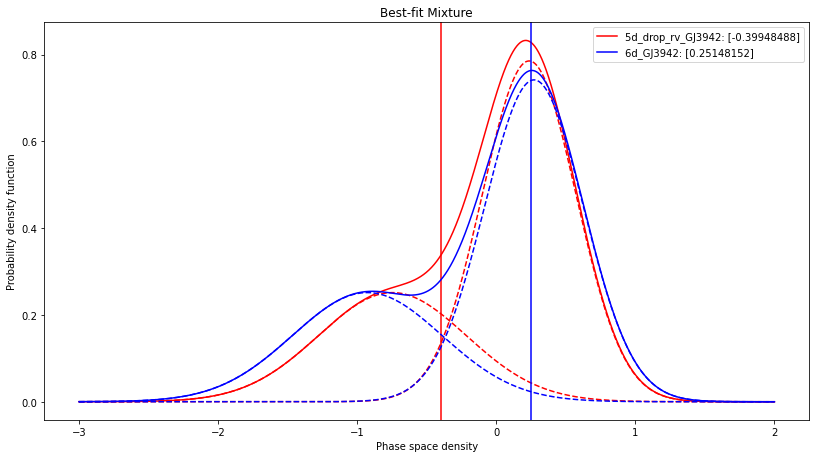

[['5d_drop_rv_GJ414A', array([-1.50396284])], ['6d_GJ414A', array([-0.78091429])]]


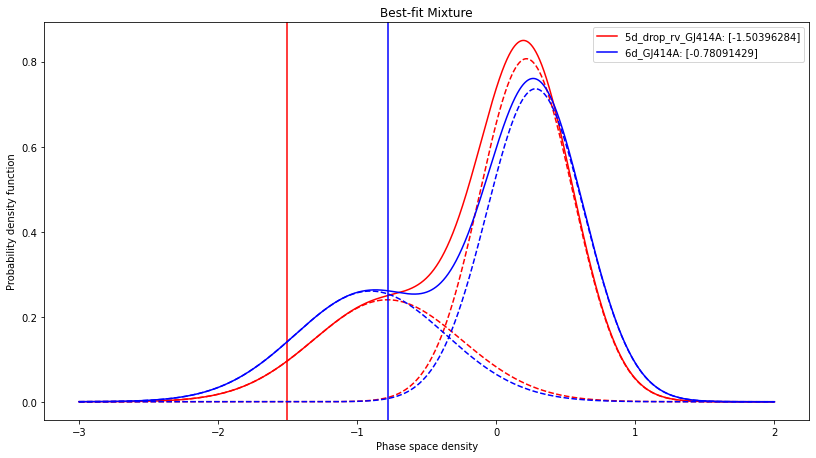

[['5d_drop_rv_GJ433', array([-1.78826038])], ['6d_GJ433', array([-0.8574976])]]


[['5d_drop_rv_GJ504', array([-0.69443671])], ['6d_GJ504', array([-0.3294954])]]


[['5d_drop_rv_GJ536', array([-3.27250856])], ['6d_GJ536', array([-1.39981305])]]


[['5d_drop_rv_GJ667C', array([-2.98766949])], ['6d_GJ667C', array([-1.09592034])]]


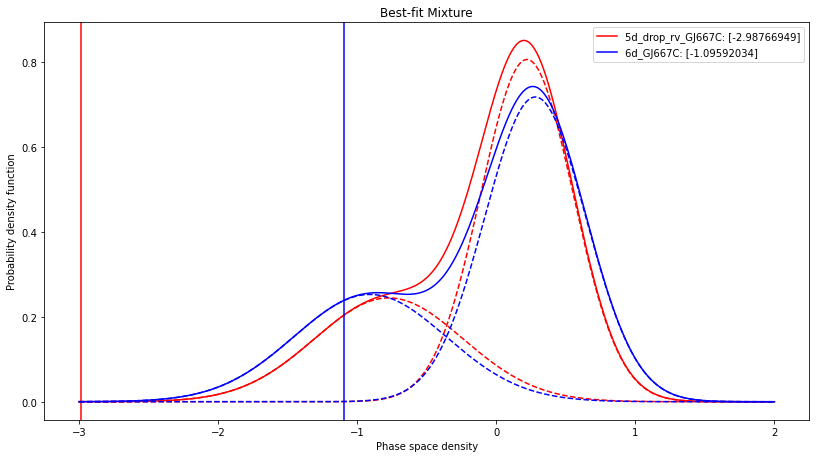

[['5d_drop_rv_GJ676A', array([-0.41025195])], ['6d_GJ676A', array([0.2448026])]]


[['5d_drop_rv_GJ685', array([-0.9474348])], ['6d_GJ685', array([-0.59707483])]]


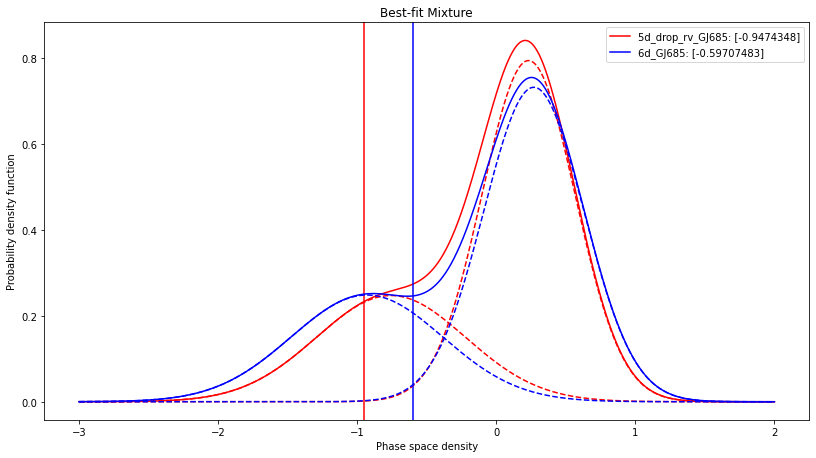

[['5d_drop_rv_GJ832', array([-1.63281889])], ['6d_GJ832', array([0.07045214])]]


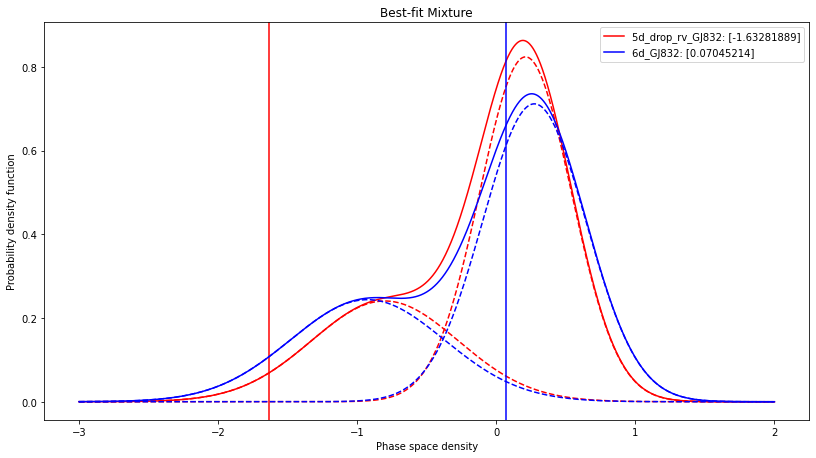

[['5d_drop_rv_GJ96', array([-0.29725891])], ['6d_GJ96', array([0.2011751])]]


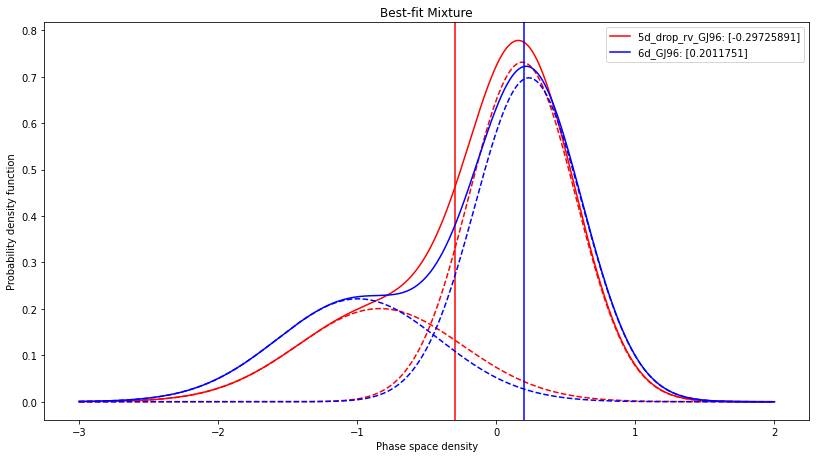

[['5d_drop_rv_GSC06214-00210', array([0.58520988])], ['6d_GSC06214-00210', array([0.98435193])]]


[['5d_drop_rv_Gl49', array([-1.75847782])], ['6d_Gl49', array([-0.12554826])]]


[['5d_drop_rv_Gl686', array([-4.45645952])], ['6d_Gl686', array([-1.88791107])]]


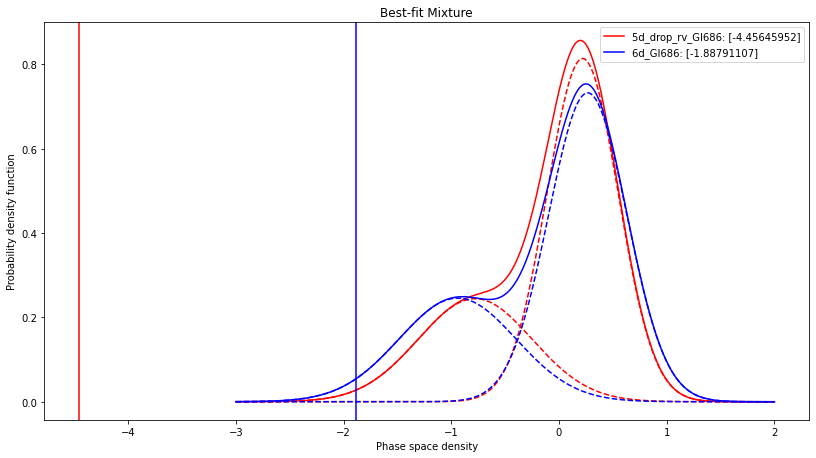

[['5d_drop_rv_HAT-P-1', array([-0.39620758])], ['6d_HAT-P-1', array([-0.40433397])]]


[['5d_drop_rv_HAT-P-11', array([-0.50640047])], ['6d_HAT-P-11', array([-0.27406559])]]


[['5d_drop_rv_HAT-P-12', array([-1.16677613])], ['6d_HAT-P-12', array([-1.59171501])]]


[['5d_drop_rv_HAT-P-13', array([0.23037571])], ['6d_HAT-P-13', array([0.40839995])]]


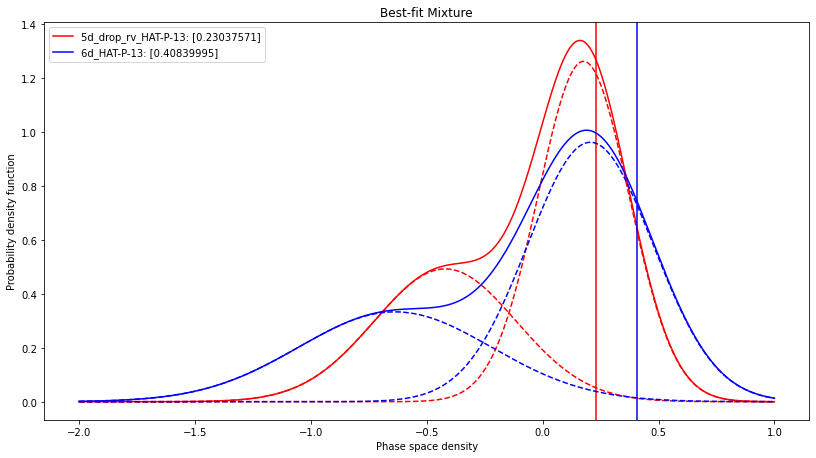

[['5d_drop_rv_HAT-P-14', array([0.31441733])], ['6d_HAT-P-14', array([0.5330244])]]


[['5d_drop_rv_HAT-P-15', array([-0.0152311])], ['6d_HAT-P-15', array([0.05166642])]]


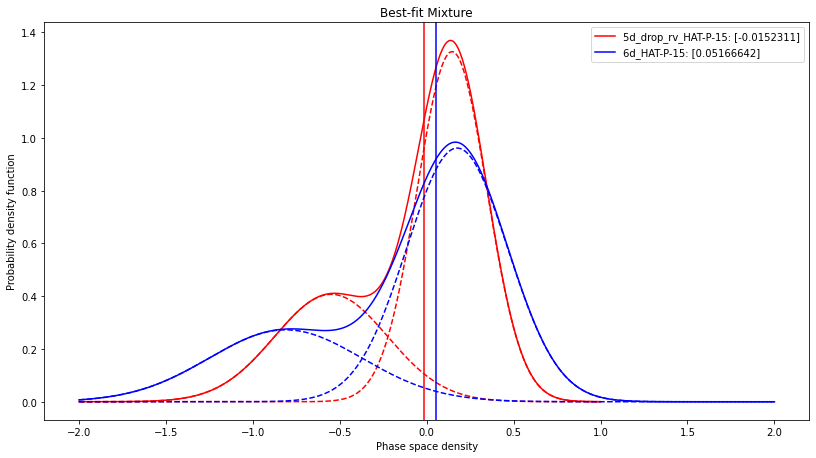

[['5d_drop_rv_HAT-P-16', array([0.1230737])], ['6d_HAT-P-16', array([-0.10936838])]]


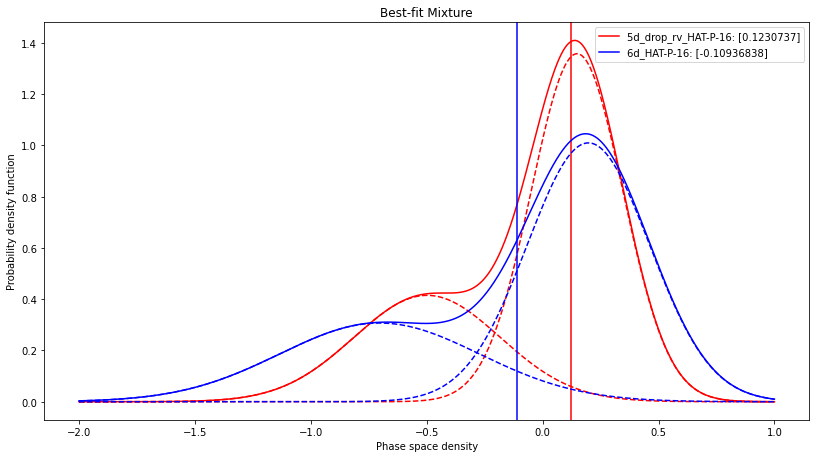

[['5d_drop_rv_HAT-P-18', array([-0.11090944])], ['6d_HAT-P-18', array([0.00242438])]]


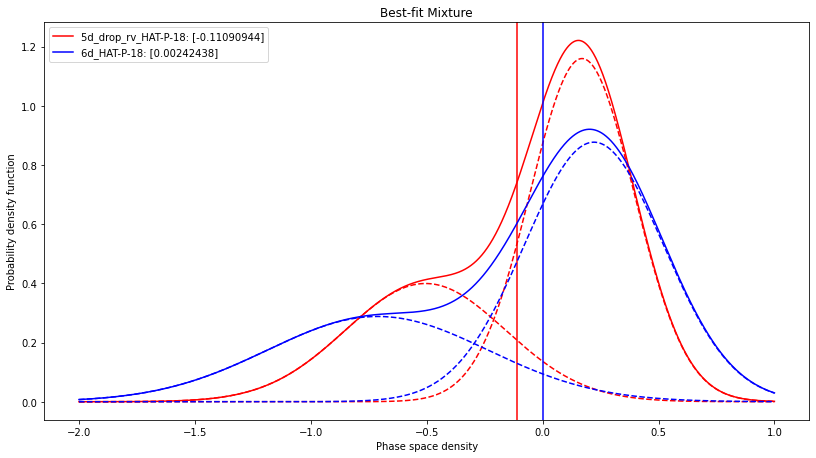

[['5d_drop_rv_HAT-P-19', array([-0.00014085])], ['6d_HAT-P-19', array([-0.1210821])]]


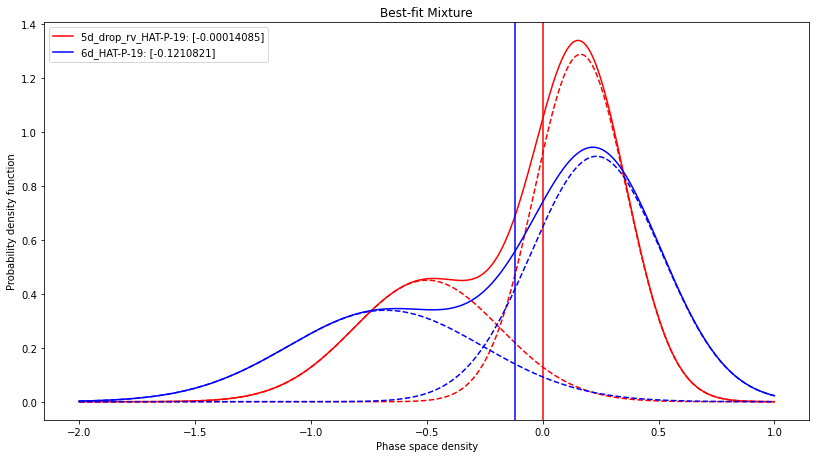

[['5d_drop_rv_HAT-P-2', array([0.1031975])], ['6d_HAT-P-2', array([0.1643699])]]


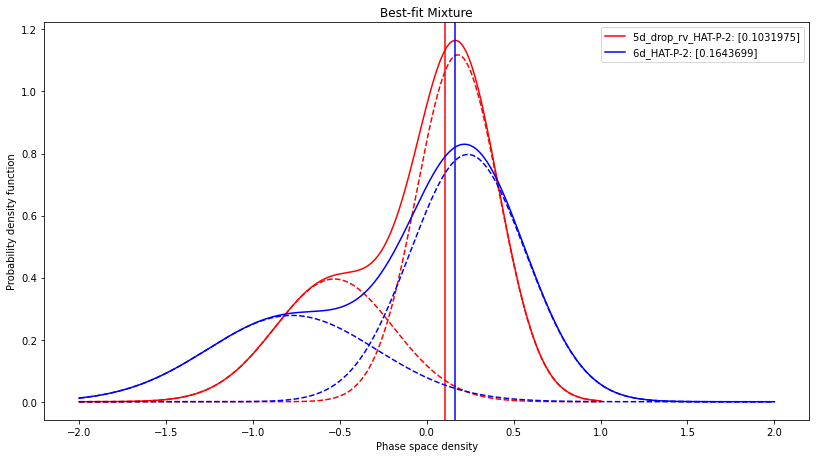

[['5d_drop_rv_HAT-P-20', array([0.20717127])], ['6d_HAT-P-20', array([0.03528678])]]


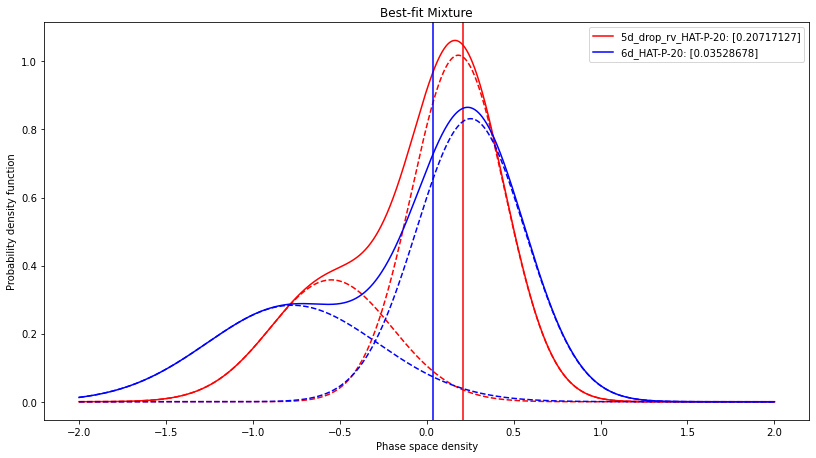

[['5d_drop_rv_HAT-P-21', array([-0.12623565])], ['6d_HAT-P-21', array([-0.13174945])]]


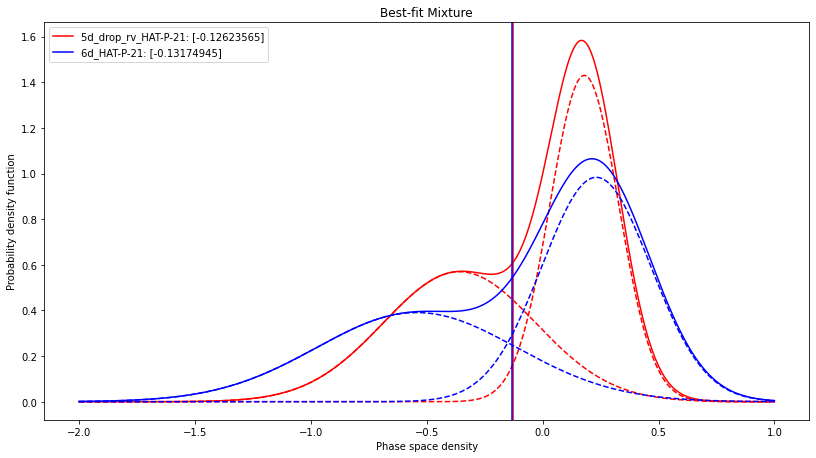

[['5d_drop_rv_HAT-P-22', array([-0.65599492])], ['6d_HAT-P-22', array([-1.31667558])]]


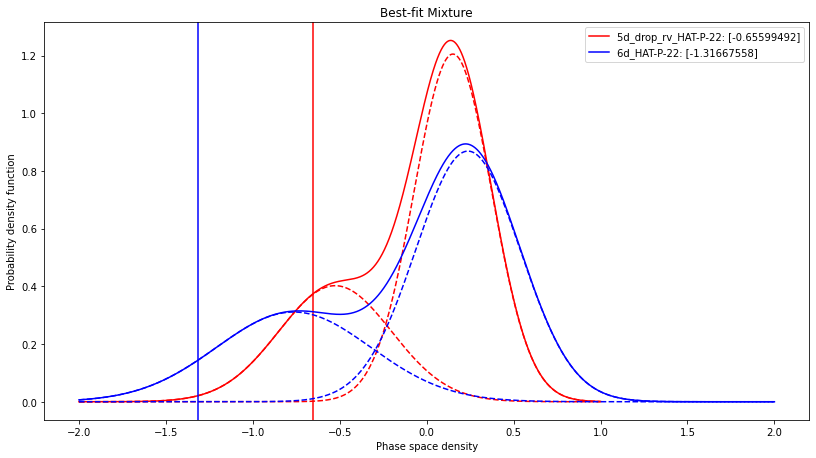

[['5d_drop_rv_HAT-P-23', array([0.26078479])], ['6d_HAT-P-23', array([0.41105091])]]


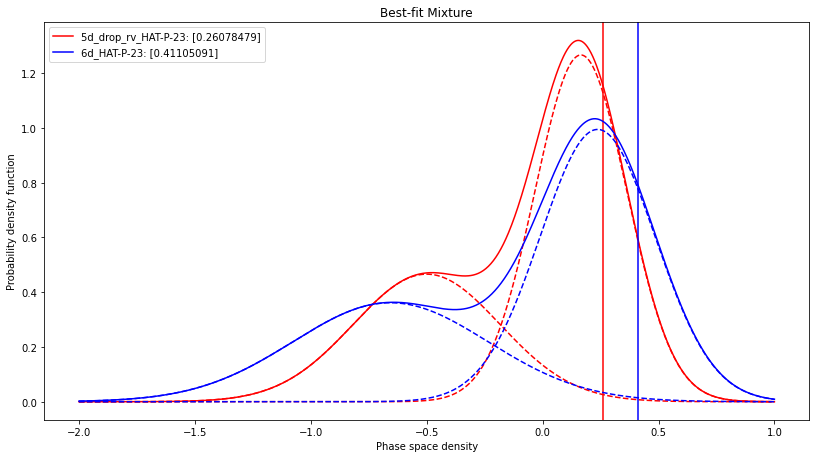

[['5d_drop_rv_HAT-P-24', array([-0.11976525])], ['6d_HAT-P-24', array([-0.12785984])]]


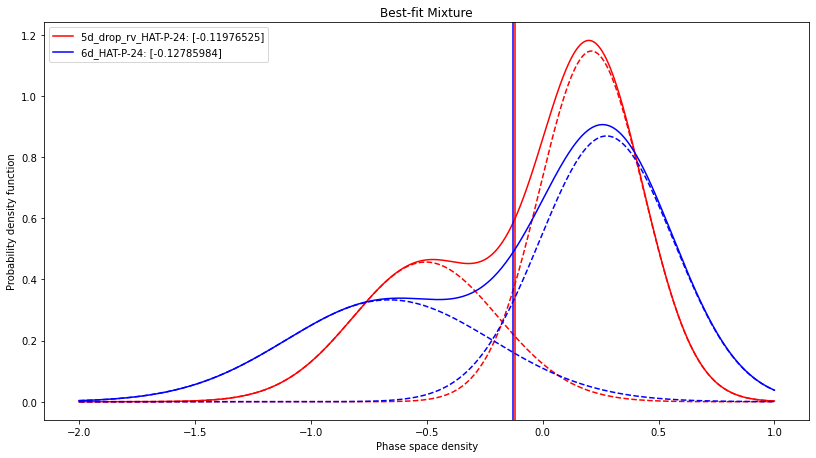

[['5d_drop_rv_HAT-P-25', array([0.26935511])], ['6d_HAT-P-25', array([0.45041679])]]


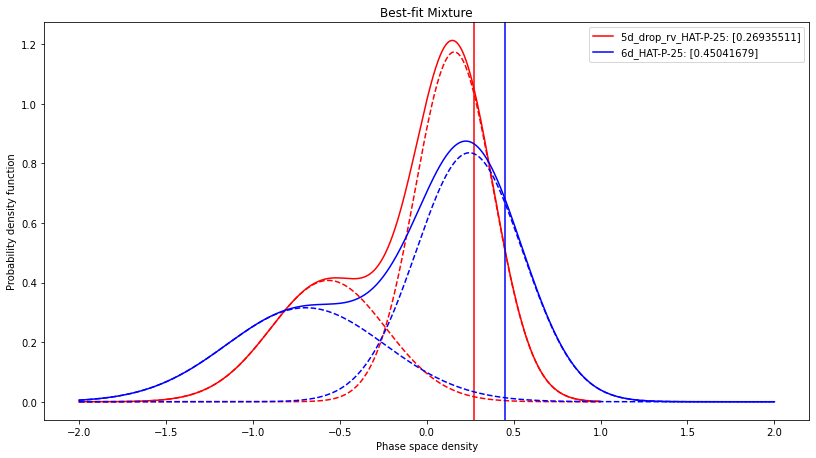

[['5d_drop_rv_HAT-P-26', array([-1.43010643])], ['6d_HAT-P-26', array([-2.00842927])]]


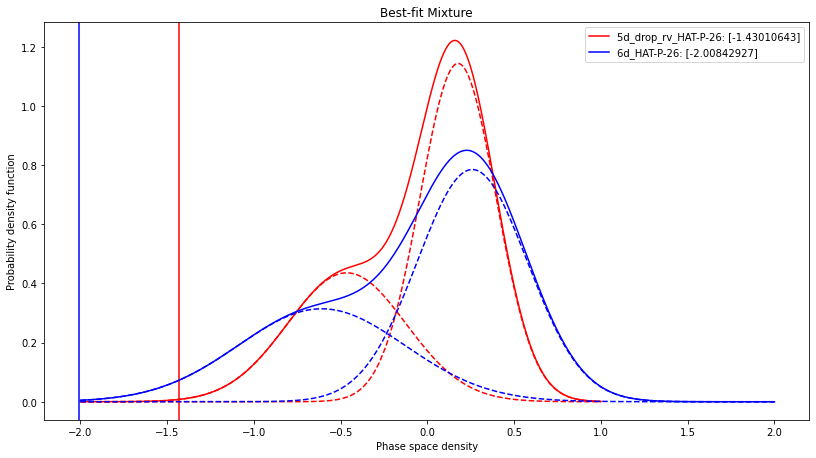

[['5d_drop_rv_HAT-P-27', array([0.45328633])], ['6d_HAT-P-27', array([0.62684449])]]


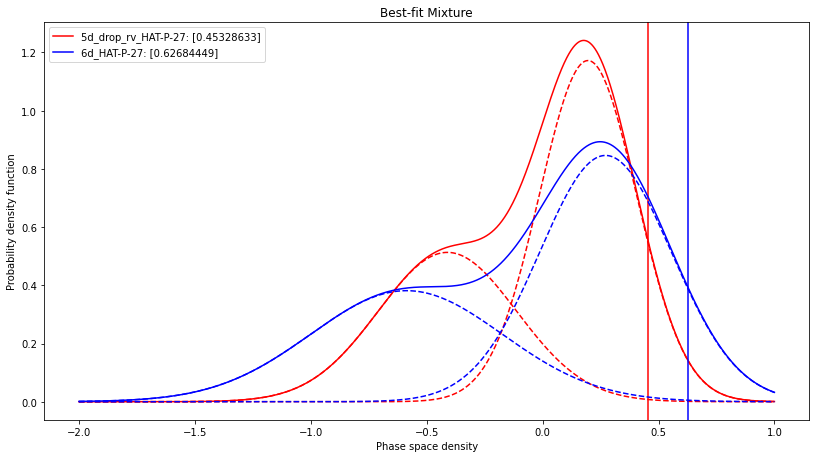

[['5d_drop_rv_HAT-P-28', array([-0.21176443])], ['6d_HAT-P-28', array([-0.26600757])]]


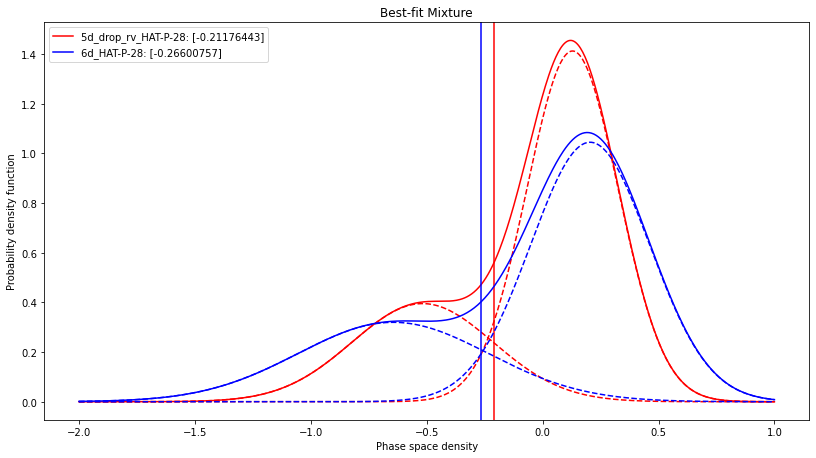

[['5d_drop_rv_HAT-P-29', array([-0.06567873])], ['6d_HAT-P-29', array([-0.07097411])]]


[['5d_drop_rv_HAT-P-3', array([0.19607454])], ['6d_HAT-P-3', array([0.42719664])]]


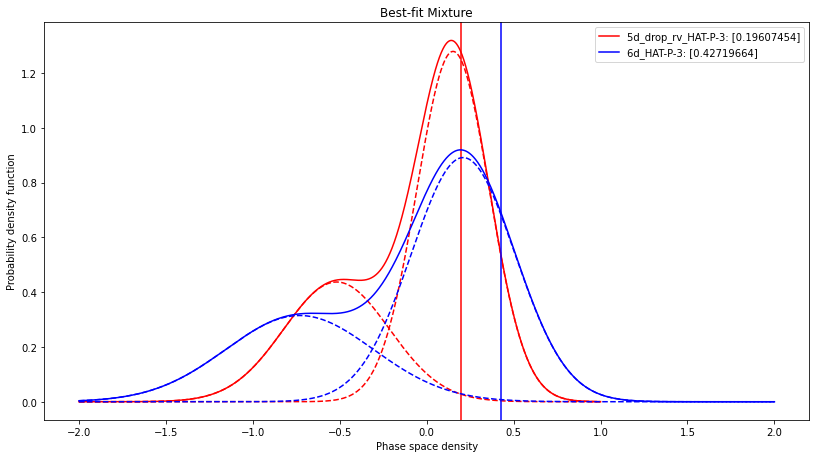

[['5d_drop_rv_HAT-P-30', array([-0.60808284])], ['6d_HAT-P-30', array([-0.74196312])]]


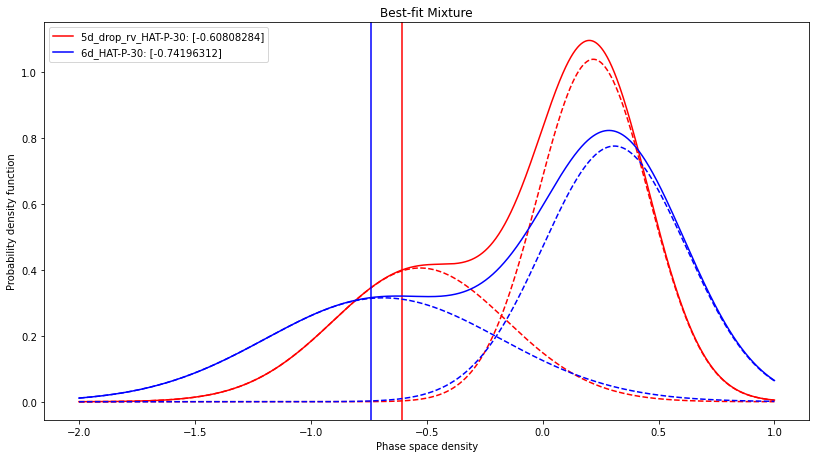

[['5d_drop_rv_HAT-P-31', array([0.14642633])], ['6d_HAT-P-31', array([0.23909664])]]


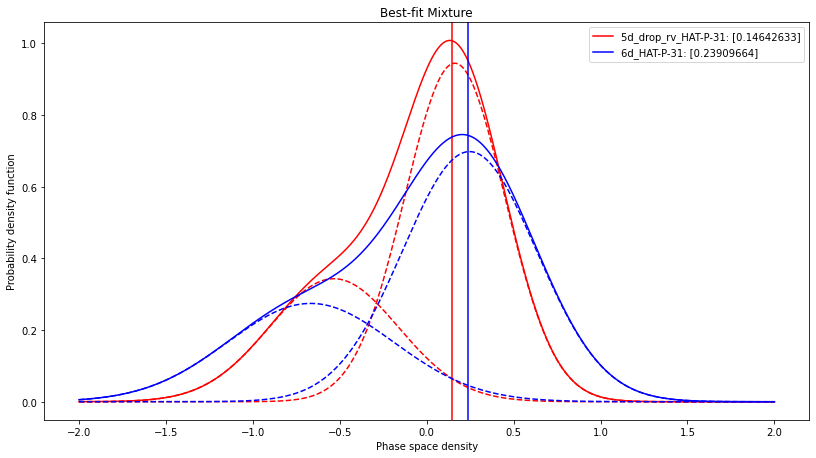

[['5d_drop_rv_HAT-P-32', array([-0.10209548])], ['6d_HAT-P-32', array([-0.12286973])]]


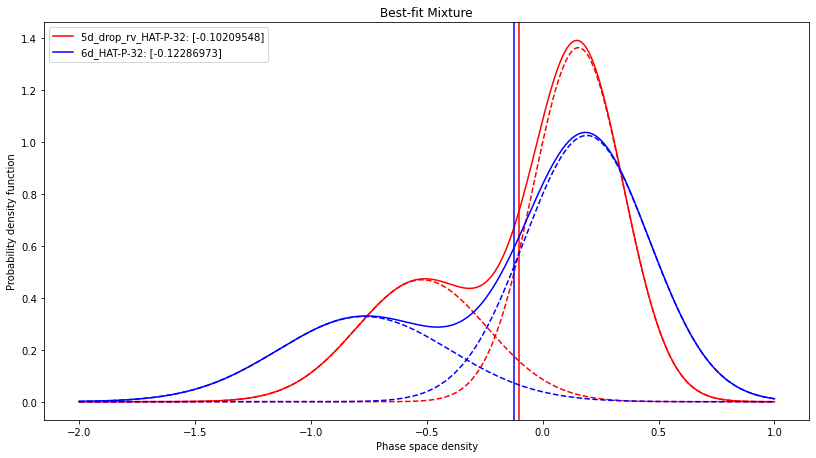

[['5d_drop_rv_HAT-P-33', array([0.25018988])], ['6d_HAT-P-33', array([0.33856231])]]


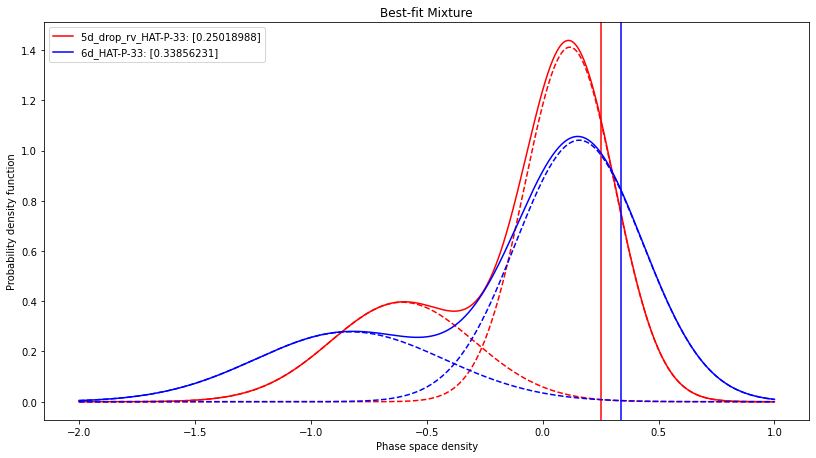

[['5d_drop_rv_HAT-P-36', array([0.27651238])], ['6d_HAT-P-36', array([0.38196967])]]


KeyboardInterrupt: 

In [4]:
combined_gaussians(show_graph=True, save_graph=False)

# 2. Create Mass x Semi-Major axis graphs for exoplanets

In [114]:
def mass_sma(exoplanets_file, features_file):
    exoplanets_dir = "data/initial_datasets"
    class_dir = "data/classification/dr3"
    ex = pd.read_csv(os.path.join(exoplanets_dir, exoplanets_file), skiprows=28)
    df = pd.read_csv(os.path.join(class_dir, features_file), index_col=0)
    df["Host"] = df["Host"].astype(str)
    #winter = load_winter()

    ex["Host"] = ex["gaia_id"].str.replace("Gaia DR2 ", "")

    ex = ex[(ex["st_age"] > 1) & (ex["st_age"] < 4.5)]
    df = pd.merge(df, ex, on="Host")

    df = df[["Host", "gm_p_high", "pl_bmasse", "pl_orbsmax"]]
    df["pl_orbsmax"] = np.log10(df["pl_orbsmax"])  
    df["mass"] = np.log10(df["pl_bmasse"])
    
    high = df[df["gm_p_high"] > 0.84]
    low = df[df["gm_p_high"] < 0.16]
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    sns.kdeplot(x=low["pl_orbsmax"], y=low["mass"], ax=ax[0], cmap="Blues", shade=True)
    sns.scatterplot(x=low["pl_orbsmax"], y=low["mass"], ax=ax[0], color="b")
    ax[0].set_xlim(-2,1)
    ax[0].set_ylim(-1, 3.5)
    ax[0].set_xticks([-2, -1, 0, 1])
    ax[0].set_yticks([-1, 0, 1, 2, 3, 3.5])
    
    sns.kdeplot(x=high["pl_orbsmax"], y=high["mass"], ax=ax[1], cmap="Reds", shade=True)
    sns.scatterplot(x=high["pl_orbsmax"], y=high["mass"], ax=ax[1], color="r")
    ax[1].set_xlim(-2,1)
    ax[1].set_ylim(-1, 3.5)
    ax[1].set_xticks([-2, -1, 0, 1])
    ax[1].set_yticks([-1, 0, 1, 2, 3, 3.5])

    return low

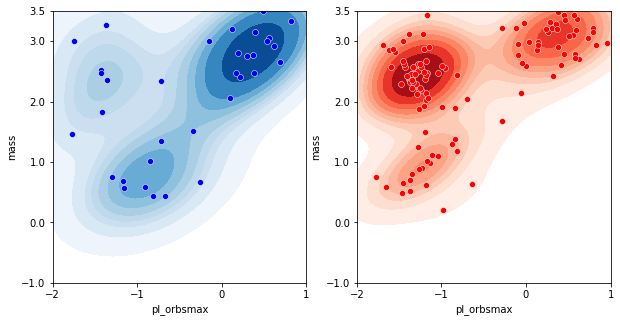

In [115]:
df = mass_sma("exoplanets.csv", "features_densities_gaiaedr3_5d_drop_rv_0_200000.csv")

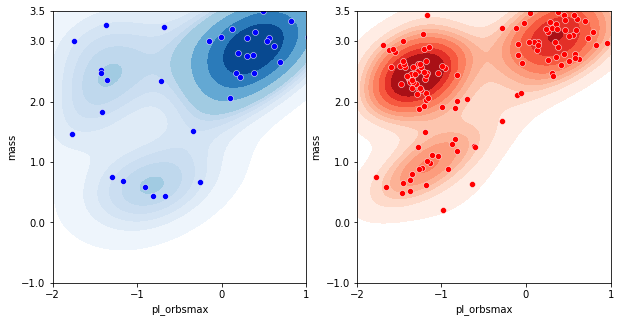

In [116]:
df = mass_sma("exoplanets.csv", "features_densities_gaiaedr3_6d_0_200000.csv")

# 3. Comparison with A. Winter Phigh results

In [30]:
def hue(row):
    # MissmatchedPlow and Phigh
    if ((row["gm_p_high"] > 0.84) & (row["logPhigh"] < 0.16)) | ((row["gm_p_high"] < 0.16) & (row["logPhigh"] > 0.84)):
        val = 0
    # Missmatched Phigh for ambigous
    elif ((row["gm_p_high"] > 0.84) & (row["logPhigh"] < 0.84)) | ((row["gm_p_high"] < 0.84) & (row["logPhigh"] > 0.84)):
        val = 1   
    # Missmatched Plow for ambigous
    elif ((row["gm_p_high"] < 0.16) & (row["logPhigh"] > 0.16)) | ((row["gm_p_high"] > 0.16) & (row["logPhigh"] < 0.16)):
        val = 2
    # Ambigous group
    elif ((row["gm_p_high"] < 0.84) & (row["logPhigh"] > 0.16)) | ((row["gm_p_high"] > 0.16) & (row["logPhigh"] < 0.84)):
        val = 3
    # Matching values
    else:
        val = 4
    return val

In [31]:
df = pd.read_csv("data/classification/dr3/features_densities_gaiaedr3_6d_0_200000.csv", dtype={"source_id": str, "Host": str}, nrows=1172, index_col=0)
labels = pd.read_csv(f"data/crossmatch/dr3/gaiaedr3_star_labels.csv", dtype={"source_id": str, "Host": str}, nrows=1172)
winter = load_winter()

In [32]:
df["source_id"] = df["Host"]
df.drop("Host", axis=1, inplace=True)

In [33]:
df = pd.merge(df, labels, on="source_id")

In [34]:
df1 = pd.merge(df, winter, on="Host")
df1["logPhigh"] = 10 ** df1["logPhigh"]
df1 = df1[["Host", "gm_p_high", "logPhigh"]]
df1["hue"] = df1.apply(hue, axis=1)

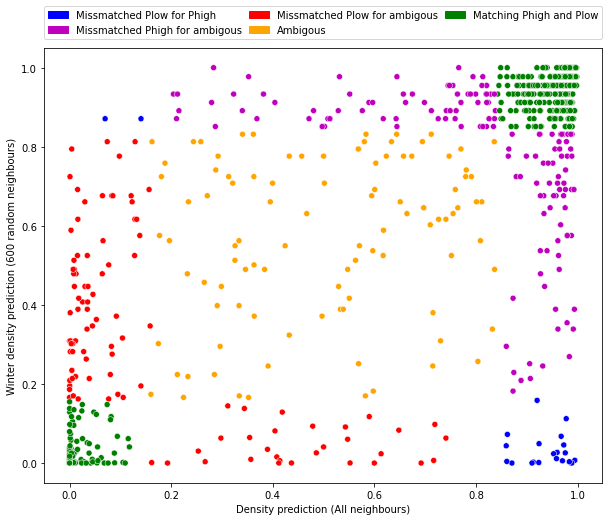

In [41]:
colors = ["blue", "m", "red", "orange", "green"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), facecolor="w")

sns.scatterplot(x=df1["gm_p_high"], y=df1["logPhigh"], hue=df1["hue"], palette=colors, ax=ax)

# Set legend
blue_patch = mpatches.Patch(color=colors[0], label="Missmatched Plow for Phigh")
magenta_patch = mpatches.Patch(color=colors[1], label="Missmatched Phigh for ambigous")
red_patch = mpatches.Patch(color=colors[2], label="Missmatched Plow for ambigous")
orange_patch = mpatches.Patch(color=colors[3], label="Ambigous")
green_patch = mpatches.Patch(color=colors[4], label="Matching Phigh and Plow")
plt.legend(handles=[blue_patch, magenta_patch, red_patch, orange_patch, green_patch], bbox_to_anchor=(0., 1.02, 1., .102), 
           loc="lower left", ncol=3, mode="expand", borderaxespad=0.);

plt.xlabel("Density prediction (All neighbours)")
plt.ylabel("Winter density prediction (600 random neighbours)")

plt.savefig("report_images/winter_comparison.png")

## Gaussian mixture fit comparison graphs

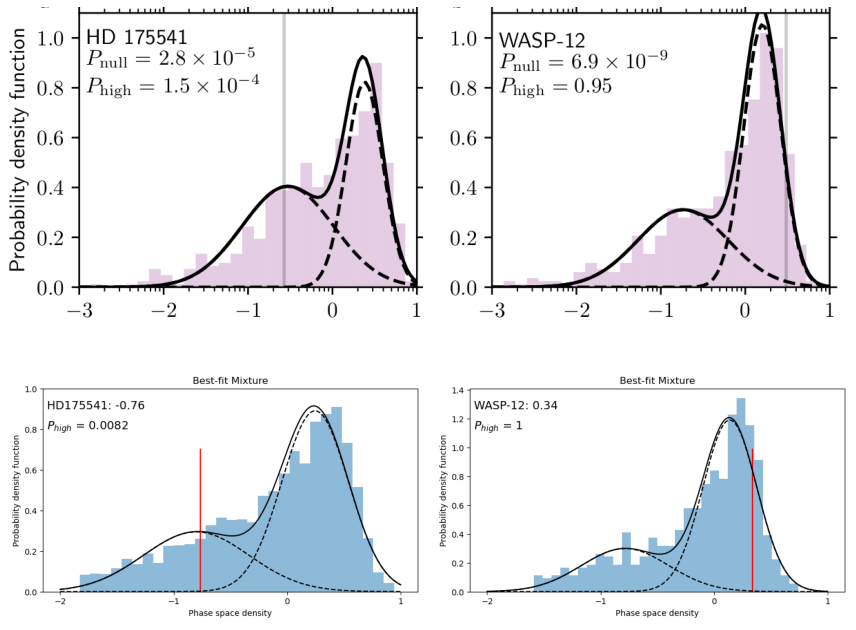

In [44]:
# read images
img_A = mpimg.imread("figures/densities_gaiaedr3_6d_only-exoplanets/HD175541.png")
img_B = mpimg.imread("figures/densities_gaiaedr3_6d_only-exoplanets/WASP-12.png")
winter_A = mpimg.imread("winter_figures/HD175541.png")
winter_B = mpimg.imread("winter_figures/WASP-12.png")

# display images
fig, ax = plt.subplots(2,2, figsize=(12,10), facecolor="w")
ax[0][0].imshow(winter_A)
ax[0][0].axis("off")
ax[0][1].imshow(winter_B)
ax[0][1].axis("off")
ax[1][0].imshow(img_A)
ax[1][0].axis("off")
ax[1][1].imshow(img_B)
ax[1][1].axis("off")

fig.tight_layout()
plt.savefig("report_images/star_density_comparison.png")